In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import datetime
import funciones_ML as bt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay,classification_report,r2_score,RocCurveDisplay
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor, SGDClassifier, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.svm import SVC, SVR
import catboost as cat
import xgboost as xgb
import lightgbm as lgb


# Configurar pandas para mostrar todas las filas y columnas
#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)


# Código para los tamaños de las fuentes y los "ticks" de los ejes:
plt.rc('font', size=6)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

CONCATENACION DE 10 ARCHIVOS CSV SOBRE MALWARE TENIENDO UN TOTAL DE CASI 2.5 MILLONES DE RESGITROS

In [5]:
column_names= ["Time", "Id_session", "Ip_host_org", "Port_org", "Ip_host_dest", "Port_dest", "Protocol_red", "Service_protocol", "Duration_conexion", "Send_orig_bytes","receive_orig_bytes", 
                "Status_connect", "Lost_orig_bytes", "Lost_dest_bytes", "missed_bytes", "Info_history_connection", "Send_host_org_packs", "Ip_orig_bytes", "Resquest_receive_packs",
                "Ip_dest_bytes", "Route_tunnels_used", "Malware_general_label", "Malware_datail_label"]

In [6]:
df_malware_total=pd.read_csv(r"D:\Cursos\REPOSITORIOS\DATASET\malware_total.csv")


FileNotFoundError: [Errno 2] No such file or directory: 'D:\\Cursos\\REPOSITORIOS\\DATASET\\malware_total.csv'

In [7]:
df_malware_total.head()

,Time,Id_session,Ip_host_org,Port_org,Ip_host_dest,Port_dest,Protocol_red,Service_protocol,Duration_conexion,Send_orig_bytes,...,Lost_dest_bytes,missed_bytes,Info_history_connection,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Route_tunnels_used,Malware_general_label,Malware_datail_label
0,"0,1525879831.015811",CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
1,"1,1525879831.025055",CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
2,"2,1525879831.045045",C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
3,"3,1525879832.016240",CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,...,-,0.0,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan
4,"4,1525879832.024985",CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,...,-,0.0,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan


In [8]:
df_malware_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25011003 entries, 0 to 25011002
Data columns (total 23 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   Time                     object 
 1   Id_session               object 
 2   Ip_host_org              object 
 3   Port_org                 float64
 4   Ip_host_dest             object 
 5   Port_dest                float64
 6   Protocol_red             object 
 7   Service_protocol         object 
 8   Duration_conexion        object 
 9   Send_orig_bytes          object 
 10  receive_orig_bytes       object 
 11  Status_connect           object 
 12  Lost_orig_bytes          object 
 13  Lost_dest_bytes          object 
 14  missed_bytes             float64
 15  Info_history_connection  object 
 16  Send_host_org_packs      float64
 17  Ip_orig_bytes            float64
 18  Resquest_receive_packs   float64
 19  Ip_dest_bytes            float64
 20  Route_tunnels_used       object 
 21  Malwar

In [9]:
df_malware_total.Malware_general_label.value_counts()/len(df_malware_total)*100

Malware_general_label
Benign                                   35.105182
Malicious                                28.207613
Malicious   DDoS                         23.102448
Malicious   PartOfAHorizontalPortScan    13.539005
Malicious   C&C                           0.034725
Malicious   Attack                        0.011015
Malicious   FileDownload                  0.000012
Name: count, dtype: float64

In [10]:
df_malware_total.Malware_datail_label.value_counts()/len(df_malware_total)*100

Malware_datail_label
-                            35.105182
PartOfAHorizontalPortScan    28.154389
C&C                           0.032938
Attack                        0.023838
HeartBeat                     0.003758
Torii                         0.000120
FileDownload                  0.000104
Name: count, dtype: float64

In [ ]:
df_malware_total

In [11]:
df_malware_total.Malware_datail_label.value_counts()

Malware_datail_label
-                            8780158
PartOfAHorizontalPortScan    7041695
C&C                             8238
Attack                          5962
HeartBeat                        940
Torii                             30
FileDownload                      26
Name: count, dtype: int64

In [28]:
obtener_estadisticas(df_malware_total)

,porcentaje_cardinalidad,Tipo,media,moda,std,var,Q1,mediana,Q3,Categoria,porcentaje_NaN
Id_session,100.0,object,No,C000004PRnYaVbKEL5,No,No,No,No,No,categorica ordinal,0.0
Ip_host_org,0.09,object,No,192.168.1.196,No,No,No,No,No,categorica ordinal,0.0
Port_org,0.26,float64,39909.62,No,16091.97,258951549.59,32980.0,42993.0,52360.0,numerica continua,0.0
Ip_host_dest,46.6,object,No,162.248.88.215,No,No,No,No,No,categorica ordinal,0.0
Port_dest,0.26,float64,9710.51,No,22174.48,491707739.75,23.0,23.0,81.0,numerica continua,0.0
Protocol_red,0.0,object,No,tcp,No,No,No,No,No,categorica ordinal,0.0
Service_protocol,0.0,object,No,-,No,No,No,No,No,categorica ordinal,0.0
Duration_conexion,4.32,object,No,-,No,No,No,No,No,categorica ordinal,0.0
Send_orig_bytes,0.26,object,No,-,No,No,No,No,No,categorica ordinal,0.0
receive_orig_bytes,0.0,object,No,-,No,No,No,No,No,categorica ordinal,0.0


In [12]:
columnas_cat_mal=["Malware_general_label", "Malware_datail_label"]

d:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\PROYECTO M_L\funciones_ML.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis')
d:\Cursos\REPOSITORIOS\ONLINE_DS_THEBRIDGE_V\PROYECTO M_L\funciones_ML.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis')


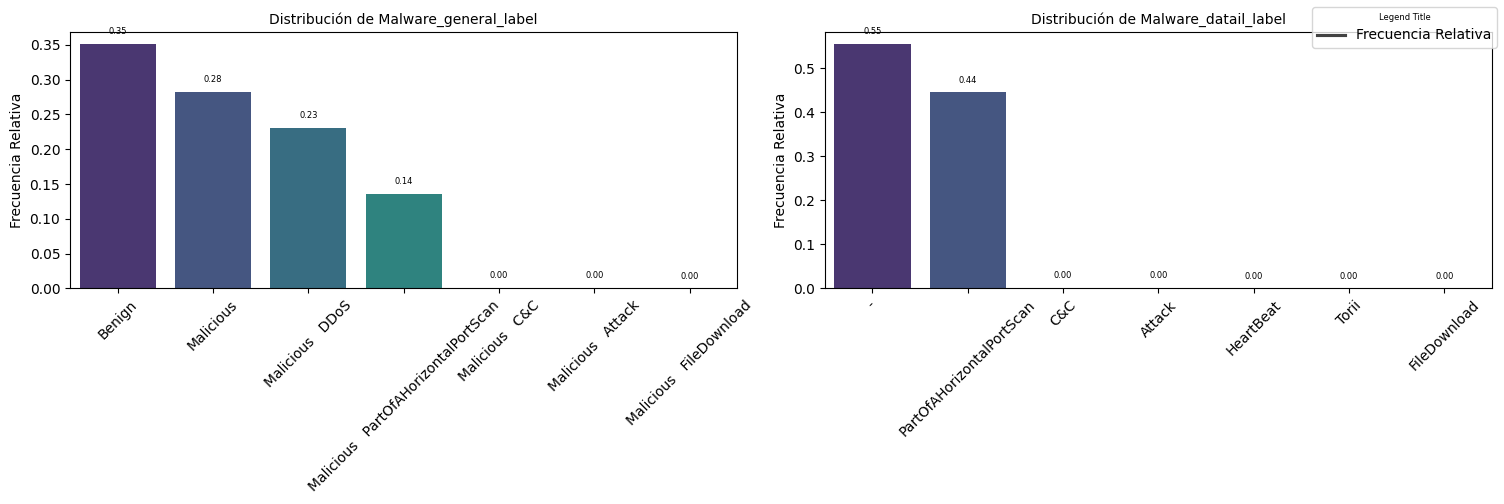

In [ ]:
pinta_distribucion_categoricas(df_malware_total, columnas_cat_mal , relativa=True, mostrar_valores=True)

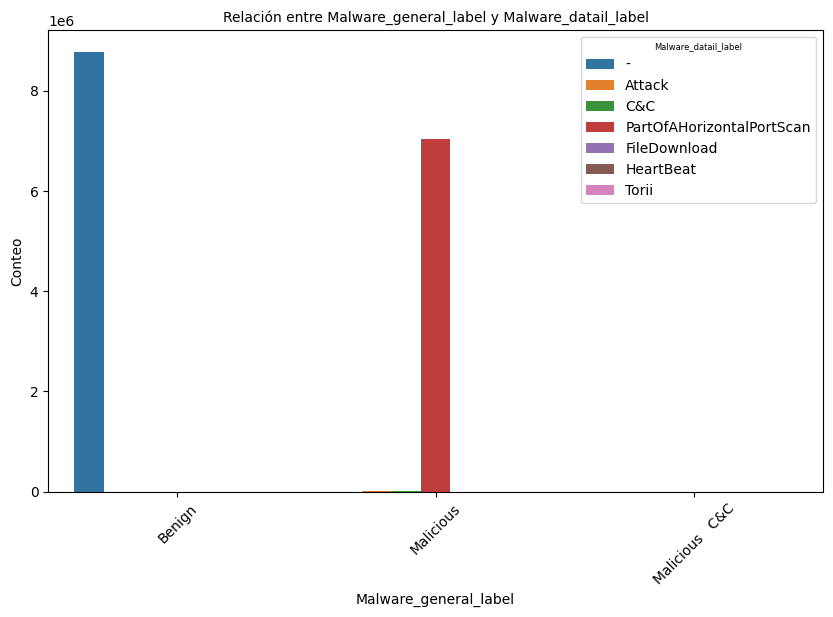

In [ ]:
plot_categorical_relationship_fin(df_malware_total, "Malware_general_label", "Malware_datail_label", relative_freq=False, show_values=False, size_group = 20)

In [ ]:
# Ajusta el nombre del DataFrame según tu situación

# Configuración del gráfico
plt.figure(figsize=(18, 6))
sns.set(style="whitegrid")

# Crear el gráfico de barras
ax = sns.countplot(data=df_modificado_FINAL, x='Tipo_ataque', hue='Intervalo')

# Añadir porcentajes en la parte superior de cada barra
total = float(len(df_modificado_FINAL))  # Número total de registros

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height + 0.1,
            '{:.2%}'.format(height / total),
            ha="center")
    

# Ajustes adicionales
plt.xlabel('Tipo_ataque' )
plt.ylabel('Frecuencia')
plt.title('Tipos de ataques por intervalos horarios')
plt.legend(title=' intervalos horarios',loc= 'lower right')
plt.show()

In [ ]:

# Correlaciones y Relaciones

# Seleccionar solo las columnas numéricas
columnas_numericas = data.select_dtypes(include='number')
plt.figure(figsize= (7,7), edgecolor="b")
sns.heatmap(columnas_numericas.corr(), annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlaciones entre Variables numericas del Dataframe')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

In [ ]:

#Crear un bar plot para la distribución de ataques por horas en intervalos
plt.figure(figsize=(12, 8))
sns.barplot(x='Hora_entera', y='Tipo_ataque', hue='Intervalo', data=data, palette='Set2')
plt.title('Distribución de Ataques por Horas en Intervalos')
plt.xlabel('Hora del Día')
plt.ylabel('Tipo de Ataque')
plt.legend(title='Intervalos', bbox_to_anchor=(1, 1))
plt.show()

In [15]:
Lista_time=df_malware_total.Time.values.tolist()

In [14]:
len(df_malware_total.Time)

25011003

In [16]:
df_malware_total_new=df_malware_total.copy()

In [18]:

# Separar la Lista_time en índice y valor
indices, valores = zip(*[map(float, Time.split(',')) for Time in Lista_time])

# Convertir los valores a formato de fecha y hora
fechas_horas = pd.to_datetime(valores, unit='s')

# Crear un DataFrame con las fechas y horas
df_malware_total_new = pd.DataFrame({'Time': fechas_horas})

# Crear columnas separadas para fecha y hora
df_malware_total_new['fecha'] = round(df_malware_total_new['Time'].dt.date,2)
df_malware_total_new['hora'] = round(df_malware_total_new['Time'].dt.time,2)

# Mostrar el DataFrame resultante
df_malware_total_new



,Time,fecha,hora
0,2018-05-09 15:30:31.015810966,2018-05-09,15:30:31.015810
1,2018-05-09 15:30:31.025054932,2018-05-09,15:30:31.025054
2,2018-05-09 15:30:31.045044899,2018-05-09,15:30:31.045044
3,2018-05-09 15:30:32.016239882,2018-05-09,15:30:32.016239
4,2018-05-09 15:30:32.024985075,2018-05-09,15:30:32.024985
...,...,...,...
25010998,2018-07-26 08:53:15.007148027,2018-07-26,08:53:15.007148
25010999,2018-07-26 08:45:48.215022087,2018-07-26,08:45:48.215022
25011000,2018-07-26 07:54:34.249972105,2018-07-26,07:54:34.249972
25011001,2018-07-26 08:52:25.171588898,2018-07-26,08:52:25.171588


In [19]:
df_malware_total_new.drop(columns=['Time'], inplace=True)

In [20]:
df_malware_total_new

,fecha,hora
0,2018-05-09,15:30:31.015810
1,2018-05-09,15:30:31.025054
2,2018-05-09,15:30:31.045044
3,2018-05-09,15:30:32.016239
4,2018-05-09,15:30:32.024985
...,...,...
25010998,2018-07-26,08:53:15.007148
25010999,2018-07-26,08:45:48.215022
25011000,2018-07-26,07:54:34.249972
25011001,2018-07-26,08:52:25.171588


In [22]:
df_malware_total= pd.concat ([df_malware_total,df_malware_total_new], axis=1)

In [25]:
df_malware_total

,Id_session,Ip_host_org,Port_org,Ip_host_dest,Port_dest,Protocol_red,Service_protocol,Duration_conexion,Send_orig_bytes,receive_orig_bytes,...,Info_history_connection,Send_host_org_packs,Ip_orig_bytes,Resquest_receive_packs,Ip_dest_bytes,Route_tunnels_used,Malware_general_label,Malware_datail_label,Date,Time
0,CUmrqr4svHuSXJy5z7,192.168.100.103,51524.0,65.127.233.163,23.0,tcp,-,2.999051,0,0,...,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,2018-05-09,15:30:31.015810
1,CH98aB3s1kJeq6SFOc,192.168.100.103,56305.0,63.150.16.171,23.0,tcp,-,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,2018-05-09,15:30:31.025054
2,C3GBTkINvXNjVGtN5,192.168.100.103,41101.0,111.40.23.49,23.0,tcp,-,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,2018-05-09,15:30:31.045044
3,CDe43c1PtgynajGI6,192.168.100.103,60905.0,131.174.215.147,23.0,tcp,-,2.998796,0,0,...,S,3.0,180.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,2018-05-09,15:30:32.016239
4,CJaDcG3MZzvf1YVYI4,192.168.100.103,44301.0,91.42.47.63,23.0,tcp,-,-,-,-,...,S,1.0,60.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,2018-05-09,15:30:32.024985
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25010998,CIHonx2ymqlX5DqnU2,192.168.100.111,28057.0,173.94.58.125,23.0,tcp,-,-,-,-,...,S,1.0,40.0,0.0,0.0,-,Malicious,PartOfAHorizontalPortScan,2018-07-26,08:53:15.007148
25010999,CwhtUD3BIdOP5L6Y8g,192.168.100.111,52876.0,69.196.96.231,23.0,tcp,-,209.874367,0,0,...,ShA,8.0,360.0,1.0,44.0,-,Benign,-,2018-07-26,08:45:48.215022
25011000,CxHWyM2vp5x1mCZmp3,192.168.100.111,39234.0,192.121.45.63,23.0,tcp,-,165.760290,0,0,...,ShA,5.0,220.0,1.0,44.0,-,Benign,-,2018-07-26,07:54:34.249972
25011001,CtmaRjXW7FOus0sPa,168.102.14.4,11.0,192.168.100.111,0.0,icmp,-,-,-,-,...,-,1.0,68.0,0.0,0.0,-,Benign,-,2018-07-26,08:52:25.171588


In [24]:
df_malware_total.drop(columns=['Time'], inplace=True)

df_malware_total.rename(columns={'fecha':'Date', "hora":"Time"}, inplace=True)

In [27]:
df_malware_total.isna().sum()

Id_session                       0
Ip_host_org                      0
Port_org                         0
Ip_host_dest                     0
Port_dest                        0
Protocol_red                     0
Service_protocol                 0
Duration_conexion                0
Send_orig_bytes                  0
receive_orig_bytes               0
Status_connect                   0
Lost_orig_bytes                  0
Lost_dest_bytes                  0
missed_bytes                     0
Info_history_connection          0
Send_host_org_packs              0
Ip_orig_bytes                    0
Resquest_receive_packs           0
Ip_dest_bytes                    0
Route_tunnels_used               0
Malware_general_label            0
Malware_datail_label       9173954
Date                             0
Time                             0
dtype: int64

In [ ]:
# Contar los guiones en cada celda del DataFrame tirando de la funcion def contar guiones de funciones_ml
total_de_guiones = df_malware_total.applymap(contar_guiones).sum().sum()

print(f"Total de guiones en todo el DataFrame: {total_de_guiones}")

C:\Users\victo\AppData\Local\Temp\ipykernel_21220\2837970403.py:5: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  total_de_guiones = df_malware_total.applymap(contar_guiones).sum().sum()


Total de guiones en todo el DataFrame: 154647508


In [ ]:
"""# Definir grupos de columnas
Identificacion_conexxion_de_la_conexion= ["Id_session","Ip_host_org","Port_org","Ip_host_dest","Port_dest"]
Cantidad_datos_enviados_Y_recibidos_de_la_conexion= ['Protocol_red', 'Service_protocol', 'Duration_conexion',
       'Send_orig_bytes', 'receive_orig_bytes', 'Status_connect',
       'Lost_orig_bytes', 'Lost_dest_bytes', 'missed_bytes',
       'Info_history_connection', 'Send_host_org_packs', 'Ip_orig_bytes',
       'Resquest_receive_packs', 'Ip_dest_bytes']
Identificación_Malware = ['Malware_general_label', 'Malware_datail_label']

# Añadir filas de información general
df_malware_total_new.loc[-1] = ['Identificacion_conexxion_de_la_conexion'] + [''] * (df_malware_total_new.shape[1] - 1)
df_malware_total_new.loc[-2] = [''] * len(Identificacion_conexxion_de_la_conexion) + ['Cantidad_datos_enviados_Y_recibidos_de_la_conexion'] + [''] * (df_malware_total_new.shape[1] - len(Identificacion_conexxion_de_la_conexion) - 1)
df_malware_total_new.loc[-3] = [''] * (len(Identificacion_conexxion_de_la_conexion) + len(Cantidad_datos_enviados_Y_recibidos_de_la_conexion)) + ['Identificación_Malware'] + [''] * (df_malware_total_new.shape[1] - len(Identificacion_conexxion_de_la_conexion) - len(Cantidad_datos_enviados_Y_recibidos_de_la_conexion) - 1)

df_malware_total_new.index = df_malware_total_new.index + 3
df_malware_total_new.sort_index(inplace=True)

# Mostrar el DataFrame resultante
#df_malware_total_new.head(8)"""



'# Definir grupos de columnas\nIdentificacion_conexxion_de_la_conexion= ["Id_session","Ip_host_org","Port_org","Ip_host_dest","Port_dest"]\nCantidad_datos_enviados_Y_recibidos_de_la_conexion= [\'Protocol_red\', \'Service_protocol\', \'Duration_conexion\',\n       \'Send_orig_bytes\', \'receive_orig_bytes\', \'Status_connect\',\n       \'Lost_orig_bytes\', \'Lost_dest_bytes\', \'missed_bytes\',\n       \'Info_history_connection\', \'Send_host_org_packs\', \'Ip_orig_bytes\',\n       \'Resquest_receive_packs\', \'Ip_dest_bytes\']\nIdentificación_Malware = [\'Malware_general_label\', \'Malware_datail_label\']\n\n# Añadir filas de información general\ndf_malware_total_new.loc[-1] = [\'Identificacion_conexxion_de_la_conexion\'] + [\'\'] * (df_malware_total_new.shape[1] - 1)\ndf_malware_total_new.loc[-2] = [\'\'] * len(Identificacion_conexxion_de_la_conexion) + [\'Cantidad_datos_enviados_Y_recibidos_de_la_conexion\'] + [\'\'] * (df_malware_total_new.shape[1] - len(Identificacion_conexxion_de_